In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

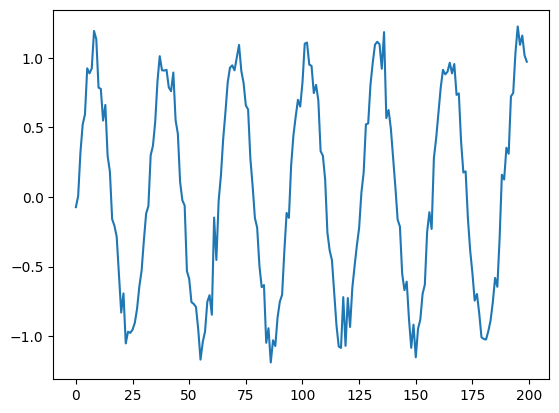

In [31]:
series = np.sin(0.2 * np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [32]:
T = 10
D = 1
X =[]
Y = []

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print(X.shape)

(190, 10, 1)


In [33]:
i = tf.keras.layers.Input(shape=(T,1))
x = tf.keras.layers.SimpleRNN(5)(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(i, x)
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - loss: 0.4703 - val_loss: 0.0447
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0513 - val_loss: 0.0630
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0476 - val_loss: 0.0631
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0579 - val_loss: 0.0560
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0516 - val_loss: 0.0573
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0488 - val_loss: 0.0458
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0431 - val_loss: 0.0465
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0335 - val_loss: 0.0355
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0287 - val_loss: 0.0268
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0290 - val_loss: 0.0338
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0304 - val_loss: 0.0267
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0225 - val_loss: 0.0242


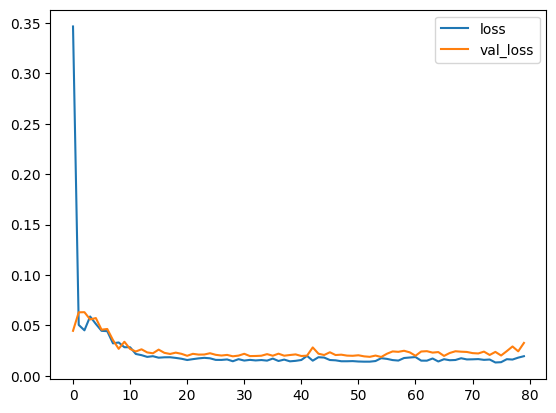

In [34]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [35]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0]

  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

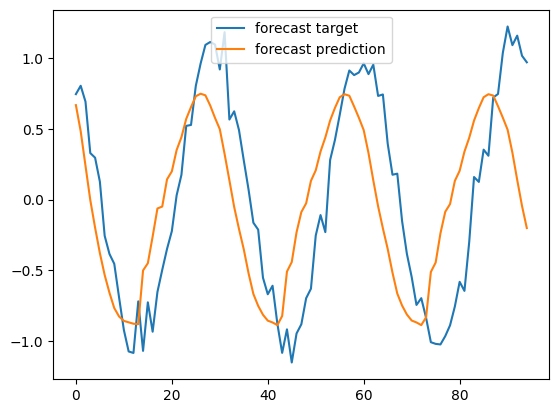

In [36]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()